In [2]:
# !pip install tensorflow
# !pip install opencv-python
# !pip install matplotlib

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os

# Importamos TF2 y Keras
import tensorflow as tf
from tensorflow import keras

# Usaremos datetime para nombrar archivos
import datetime

import numpy as np
import matplotlib.pyplot as plt

# para cargar imagenes desde internet usaremos estas librerias
from PIL import Image
import requests
from io import BytesIO

# lo usaremos para reescalar imagen
import cv2

#!rm -rf ./logs/

# nos aseguramos de que estemos con tf 2.0
print(tf.__version__)

2.1.0


## Importamos el dataset  
Usaremos 60,000 imagenes para entrenar la red y 10,000 imagenes para evaluar con que precision aprendio la red para clasificar las imagenes. Podemos acceder al Fashion MNIST directamente desde TensorFlow.  

Importamos y cargamos los datos de Fashion MNIST directamente desde TensorFlow:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

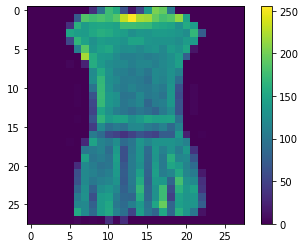

In [4]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

### Las etiquetas son una matriz de enteros, que van de 0 a 9. Estas corresponden a la clase de vestimenta que representa la imagen:

In [5]:
class_names = ['Camiseta', 'Pantalon', 'Sueter', 'Vestido', 'Abrigo', 'Sandalias', 'Camisa',
               'Zapatilla deportiva', 'Bolso', 'Botines']

<br><br>
## Exploramos datos

In [6]:
train_images[0].shape

(28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
train_labels.shape

(60000,)

In [9]:
test_labels.shape

(10000,)

In [10]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [11]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

<br><br>
## Pre - Procesamiento de datos

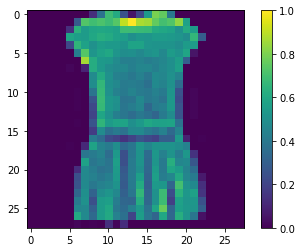

In [12]:
# para que el rango vaya de 0 a 1
train_images = train_images / 255
test_images = test_images / 255

plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

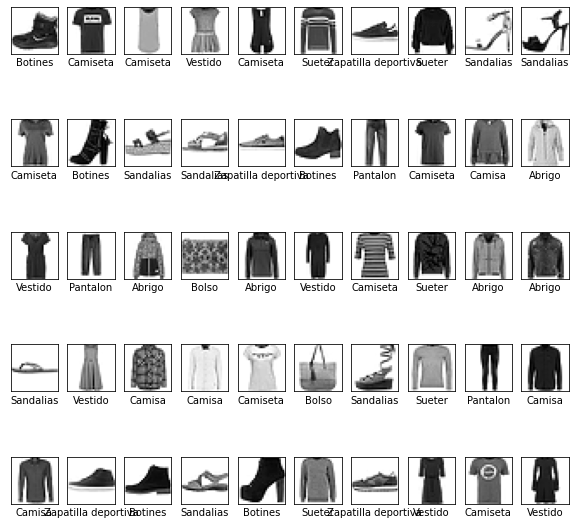

In [13]:
# imprimir varias imagenes
plt.figure(figsize=(10,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
                    
plt.show()

<br><br>
## Configuramos la red neuronal
<img src="https://cdn-images-1.medium.com/max/1200/1*DpMaU1p85ZSgamwYDkzL-A.png">

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])